In [1]:
#This notebook generates the plots for Figure 3 of the main text.

In [2]:
#import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib notebook
from numpy import *
import scipy
from pygsti.construction import std1Q_XYI
import pickle

In [3]:
def makeBarPlots(dataGrid,idealGrid,labels,scrunch=0.5,smallThreshold=1e-5,\
                 zeroPositiveColor='#FFF0C3',zeroNegativeColor='#C3FFEB',\
                 negativeColor='#3223AF',positiveColor='#C61820',linewidth=1,\
                 fontsize=12,zTicks = [0,0.5,1],idealColor=(0,0,0,0.1),\
                 dataOpacity=0.9,azim=14,elev=58,fileName=None,shouldShow=True,logPlot=False,zTickLabels=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')    
    ax1.set_xticklabels(labels,fontsize=fontsize)    
    ax1.set_xticks(array(range(len(labels)))+0.25)
    ax1.set_yticklabels(labels,fontsize=fontsize)    
    ax1.set_yticks(array(range(len(labels)))+0.25)
    ax1.set_zticks(zTicks)
    if zTickLabels is None:
        ax1.set_zticklabels(zTicks,fontsize=fontsize)   
    else:
        ax1.set_zticklabels(zTickLabels,fontsize=fontsize)   
    for i in range(dataGrid.shape[0]):
        for j in range(dataGrid.shape[1]):                
            b = [[i,i+1*scrunch],[j,j+1*scrunch],[abs(dataGrid[i,j]),abs(idealGrid[i,j])]]
            poly3D = [[(b[0][0],b[1][0],b[2][0]),(b[0][0],b[1][1],b[2][0]),(b[0][1],b[1][1],b[2][0]),(b[0][1],b[1][0],b[2][0])],
                      [(b[0][0],b[1][0],b[2][0]),(b[0][0],b[1][0],b[2][1]),(b[0][1],b[1][0],b[2][1]),(b[0][1],b[1][0],b[2][0])],
                      [(b[0][0],b[1][0],b[2][0]),(b[0][0],b[1][0],b[2][1]),(b[0][0],b[1][1],b[2][1]),(b[0][0],b[1][1],b[2][0])],
                      [(b[0][1],b[1][1],b[2][1]),(b[0][1],b[1][1],b[2][0]),(b[0][1],b[1][0],b[2][0]),(b[0][1],b[1][0],b[2][1])],
                      [(b[0][1],b[1][1],b[2][1]),(b[0][1],b[1][1],b[2][0]),(b[0][0],b[1][1],b[2][0]),(b[0][0],b[1][1],b[2][1])],
                      [(b[0][1],b[1][1],b[2][1]),(b[0][0],b[1][1],b[2][1]),(b[0][0],b[1][0],b[2][1]),(b[0][1],b[1][0],b[2][1])]          
                     ]
            ax1.add_collection3d(Poly3DCollection(poly3D, facecolors=idealColor, linewidths=linewidth))        
            if abs(idealGrid[i,j])<smallThreshold:
                valType = 'zero'
            elif idealGrid[i,j]<0:
                valType = 'negative'
            else:
                valType = 'positive'
            if not logPlot:
                b = [[i,i+1*scrunch],[j,j+1*scrunch],[0,abs(dataGrid[i,j])]]
            else:
                if abs(dataGrid[i,j]) == 0:
                    [[i,i+1*scrunch],[j,j+1*scrunch],[0,0.]]
                else:
                    b = [[i,i+1*scrunch],[j,j+1*scrunch],[0,abs(log(abs(dataGrid[i,j]))/log(10.))]]
            poly3D = [[(b[0][0],b[1][0],b[2][0]),(b[0][0],b[1][1],b[2][0]),(b[0][1],b[1][1],b[2][0]),(b[0][1],b[1][0],b[2][0])],
                      [(b[0][0],b[1][0],b[2][0]),(b[0][0],b[1][0],b[2][1]),(b[0][1],b[1][0],b[2][1]),(b[0][1],b[1][0],b[2][0])],
                      [(b[0][0],b[1][0],b[2][0]),(b[0][0],b[1][0],b[2][1]),(b[0][0],b[1][1],b[2][1]),(b[0][0],b[1][1],b[2][0])],
                      [(b[0][1],b[1][1],b[2][1]),(b[0][1],b[1][1],b[2][0]),(b[0][1],b[1][0],b[2][0]),(b[0][1],b[1][0],b[2][1])],
                      [(b[0][1],b[1][1],b[2][1]),(b[0][1],b[1][1],b[2][0]),(b[0][0],b[1][1],b[2][0]),(b[0][0],b[1][1],b[2][1])],
                      [(b[0][1],b[1][1],b[2][1]),(b[0][0],b[1][1],b[2][1]),(b[0][0],b[1][0],b[2][1]),(b[0][1],b[1][0],b[2][1])]          
                     ]
            if i==0:
                color = 'w'
            elif valType =='zero':
                if dataGrid[i,j]<0:
                    color = zeroNegativeColor
                else:
                    color = zeroPositiveColor
            elif valType == 'positive':
                color = positiveColor
            else:
                color = negativeColor
            ax1.add_collection3d(Poly3DCollection(poly3D, facecolors=color, linewidths=linewidth, alpha=dataOpacity))
            ax1.auto_scale_xyz([0,dataGrid.shape[0]-0.25],[0,dataGrid.shape[1]-0.25],\
                              [0,max(zTicks)])
            ax1.view_init(azim=azim,elev=elev)
    if fileName is not None:
        plt.savefig(fileName)
    if shouldShow:
        plt.show()
            
            

<IPython.core.display.Javascript object>


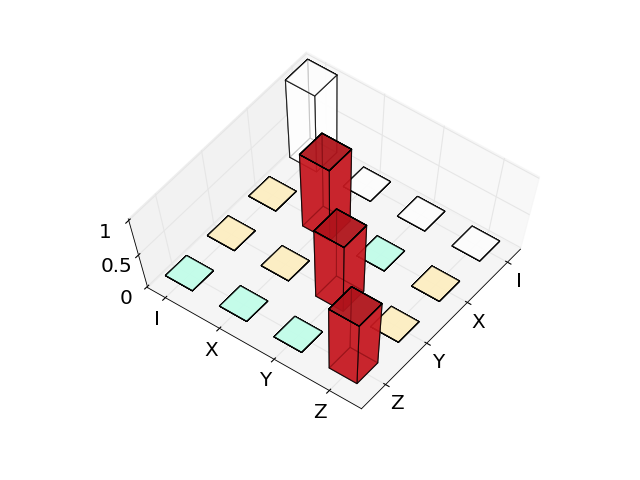

<IPython.core.display.Javascript object>


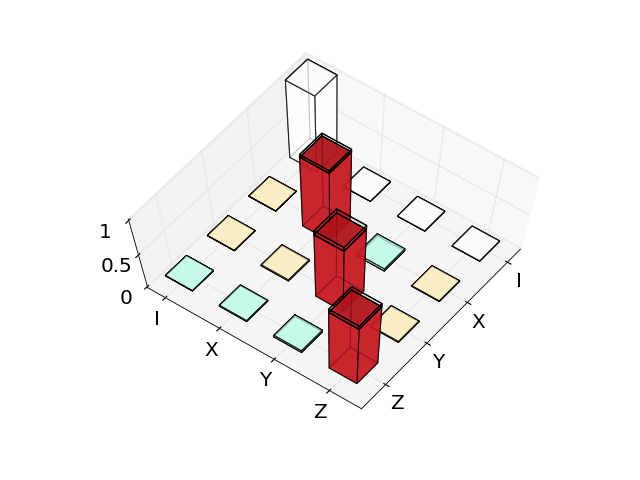

<IPython.core.display.Javascript object>


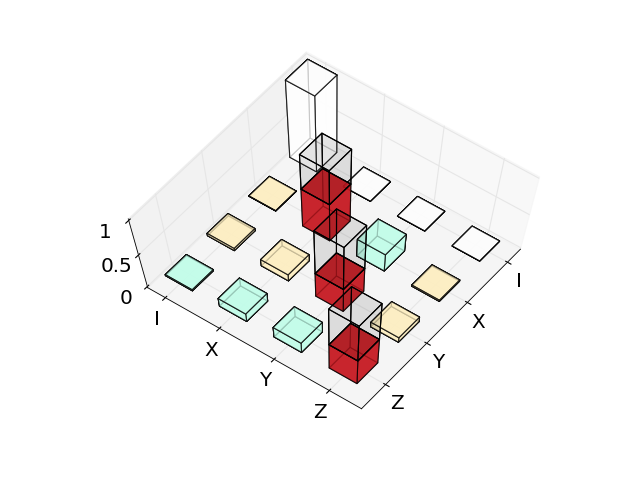

<IPython.core.display.Javascript object>


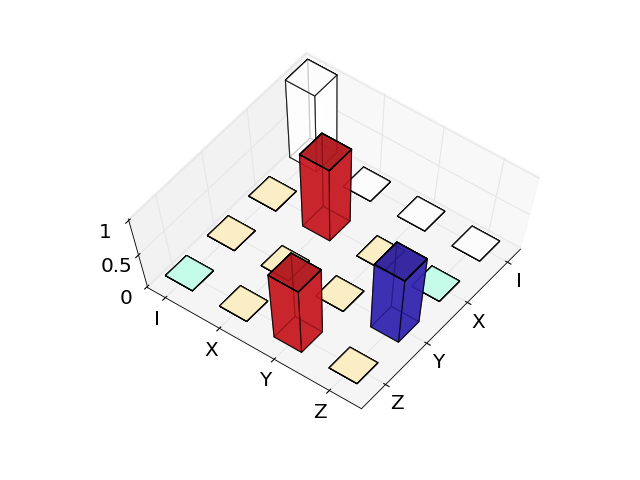

<IPython.core.display.Javascript object>


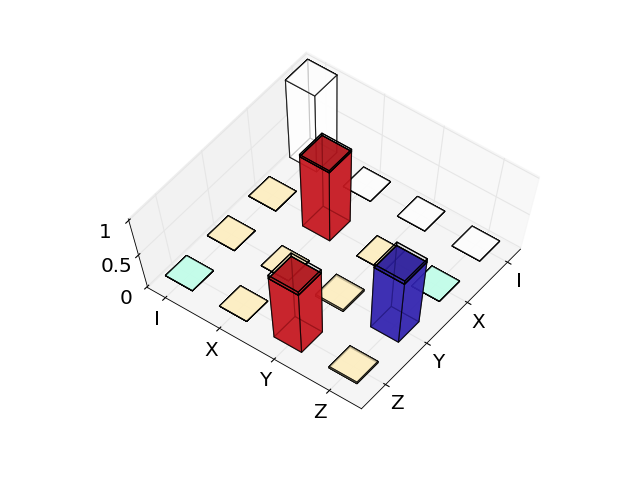

<IPython.core.display.Javascript object>


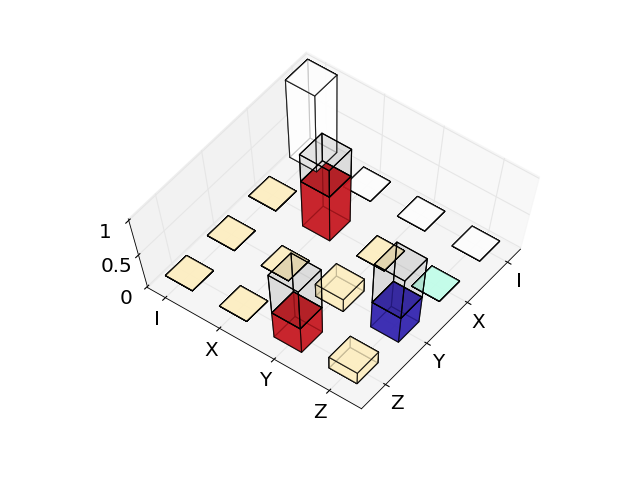

<IPython.core.display.Javascript object>


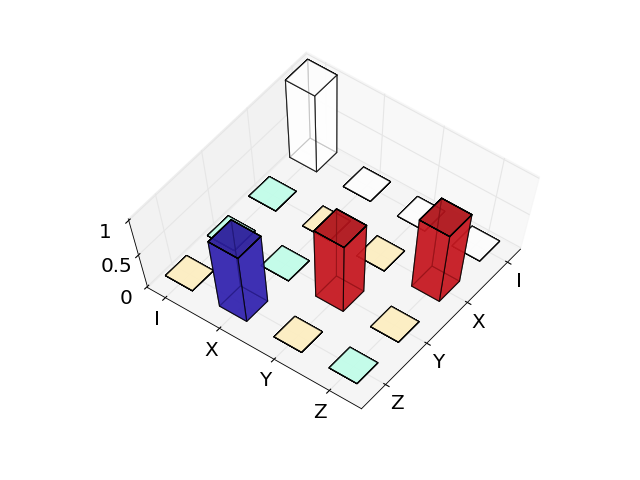

<IPython.core.display.Javascript object>


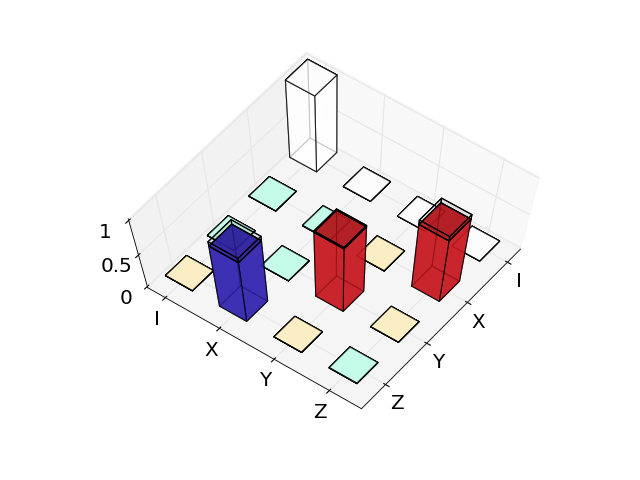

<IPython.core.display.Javascript object>


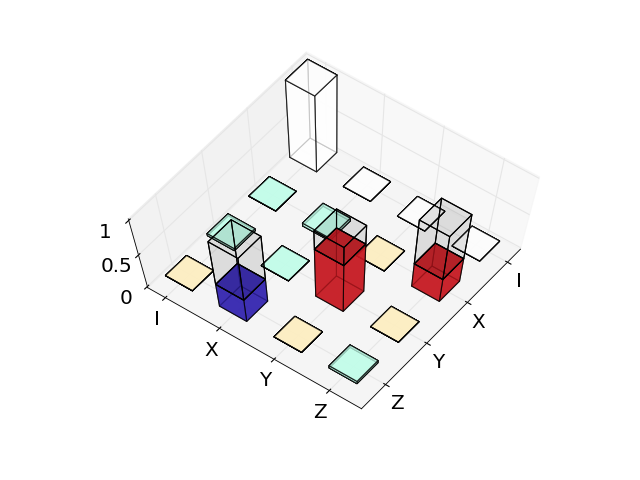

In [4]:
gs_target = std1Q_XYI.gs_target.copy()
resultsObj = pickle.load(open('../ComputedObjects/2015_03_30-GST_BB1_XYXY_8192_condensed.pkl','r'))
gs_exp = resultsObj.gatesets['final estimate']

labels=['I','X','Y','Z']
for G in ['Gi','Gx','Gy']:
    for L in [1,513,8193]:
        makeBarPlots(linalg.matrix_power(gs_exp[G],L),linalg.matrix_power(gs_target[G],L),labels,\
                     dataOpacity=0.75,idealColor=(0,0,0,0.05),fontsize=18,fileName='../Figures/Fig3a-'+G+'_'+str(L)+'.pdf',azim=37,elev=71)        

In [5]:
#Now time to make the error generator plots! (Fig. 3b)

<IPython.core.display.Javascript object>


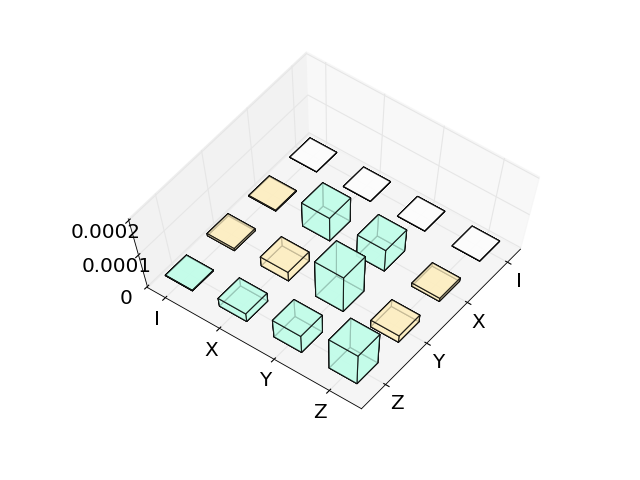

<IPython.core.display.Javascript object>


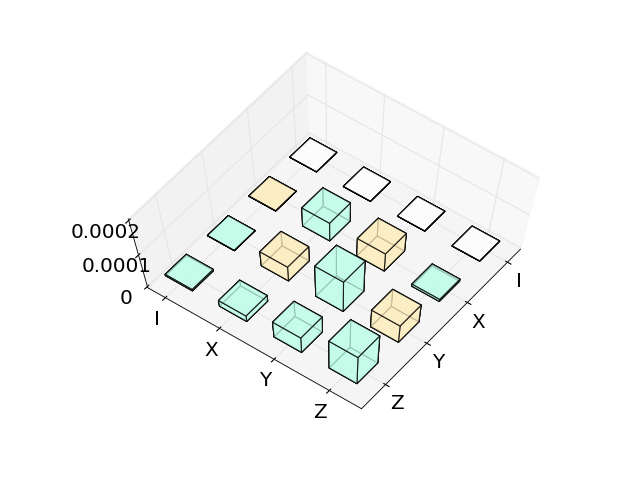

<IPython.core.display.Javascript object>


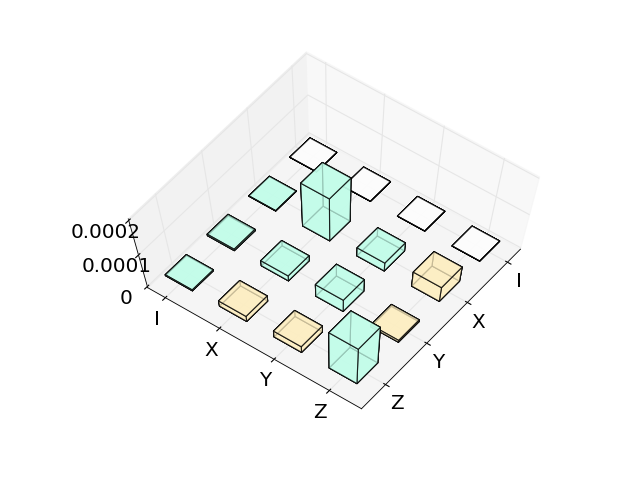

In [6]:
for G in ['Gi','Gx','Gy']:
    error_gen = scipy.linalg.logm(dot(linalg.matrix_power(std1Q_XYI.gs_target[G],-1),gs_exp[G]))
    makeBarPlots(error_gen,zeros((4,4)),labels,\
             dataOpacity=0.75,idealColor=(0,0,0,0.05),zTicks=[0,1e-4,2e-4],\
#             fontsize=18,azim=37,elev=71,zTickLabels=[r'$0$',r'$1\cdot10^{-4}$',r'$2\cdot10^{-4}$'],fileName='../Figures/Main-3b-'+G+'_Error_Gen.pdf')
             fontsize=18,azim=37,elev=71,fileName='../Figures/Fig3b-'+G+'_Error_Gen.pdf')

plt.show()